In [515]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [516]:
t1_data: pd.DataFrame = pd.DataFrame()

t1_data["street"] = [80, 98, 75, 91, 78]
t1_data["garage"] = [100, 82, 105, 89, 102]
    
street = t1_data["street"].values
garage = t1_data["garage"].values

corr = t1_data["garage"].corr(t1_data["street"])
# corr.style.background_gradient(cmap='coolwarm')

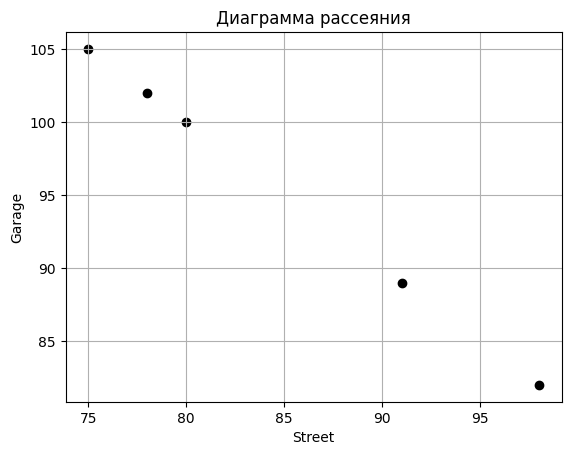

In [517]:
plt.grid(True)
plt.scatter(street, garage, marker = 'o', color = 'black')
plt.xlabel("Street")
plt.ylabel("Garage")
plt.title("Диаграмма рассеяния")
plt.show()

In [518]:
data: pd.DataFrame = pd.read_csv("elden_ring_steam_reviews.csv")
data

,id,language,review,created,voted_up,votes_up,comment_count,steam_purchase,recieved_for_free,written_during_early_access,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
0,134238864,english,being killed over and over again is fun,2023-03-07 14:19:11,True,0,0,False,False,False,47,2,355,355,346,2023-03-07 14:29:21
1,134238208,english,I write this review as I have 100% completed E...,2023-03-07 14:03:24,True,0,0,True,False,False,110,2,24238,5823,24238,2023-03-07 02:08:22
2,134238033,english,Fun,2023-03-07 13:59:13,True,0,0,True,False,False,11,1,912,912,881,2023-03-07 14:30:07
3,134237508,english,pretty cool.,2023-03-07 13:46:37,True,0,0,True,False,False,94,8,8497,2914,8497,2023-03-07 13:44:52
4,134236511,english,AMAZINGGGGGGGGGGGGG,2023-03-07 13:20:04,True,0,0,True,False,False,4,1,985,163,923,2023-03-07 14:26:41
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9789,131803069,english,Best platformer of the year.,2023-01-29 14:50:25,True,0,0,True,False,False,112,8,12095,1751,7565,2023-03-06 13:54:32
9790,131802918,english,"truly fun...very recommended, worth the money ...",2023-01-29 14:47:55,True,0,0,True,False,False,17,4,9467,39,8394,2023-02-26 17:51:52
9791,131802717,english,mimic is the friend we made along the way,2023-01-29 14:44:41,True,0,0,True,False,False,34,3,8098,6,5655,2023-02-23 10:17:41
9792,131802309,english,"The lands of Elden Ring are vast and wild, fil...",2023-01-29 14:38:38,True,1,0,True,False,False,70,8,9472,201,9191,2023-03-05 13:39:17


In [519]:
from sklearn.calibration import LabelEncoder
import sklearn.preprocessing as preprocessing


encoder = preprocessing.LabelEncoder()
data["review"].fillna("empty", inplace=True)

for column in data.columns:
    if data[column].dtype == 'object':
    # Примените кодирование только к колонкам с типом 'object' (строки)
        data[column] = encoder.fit_transform(data[column])

del data["id"]
del data["steam_purchase"]
del data["language"]
del data["written_during_early_access"]

In [520]:
data.corr().style.background_gradient(cmap='coolwarm')

,review,created,voted_up,votes_up,comment_count,recieved_for_free,author_num_games_owned,author_num_reviews,author_playtime_forever,author_playtime_last_two_weeks,author_playtime_at_review,author_last_played
review,1.000000,-0.023204,0.010953,-0.031305,-0.018181,0.027622,-0.091445,-0.023589,-0.065847,-0.023534,-0.067343,0.004335
created,-0.023204,1.000000,0.011790,-0.021531,-0.019659,0.004237,0.021297,-0.006229,-0.023126,0.238068,0.041075,0.311837
voted_up,0.010953,0.011790,1.000000,-0.017560,-0.125141,-0.001306,-0.041253,-0.055828,0.074437,0.048198,0.065102,0.099385
votes_up,-0.031305,-0.021531,-0.017560,1.000000,0.276951,0.009255,0.012464,0.013080,-0.003382,-0.011928,-0.002120,-0.015617
comment_count,-0.018181,-0.019659,-0.125141,0.276951,1.000000,0.015935,0.018932,0.020453,-0.017191,-0.011493,-0.016541,-0.018678
recieved_for_free,0.027622,0.004237,-0.001306,0.009255,0.015935,1.000000,-0.020406,0.005952,-0.017347,0.011982,-0.020111,-0.009032
author_num_games_owned,-0.091445,0.021297,-0.041253,0.012464,0.018932,-0.020406,1.000000,0.417477,0.048962,-0.022585,0.059616,-0.055043
author_num_reviews,-0.023589,-0.006229,-0.055828,0.013080,0.020453,0.005952,0.417477,1.000000,-0.062666,-0.023522,-0.056269,-0.075365
author_playtime_forever,-0.065847,-0.023126,0.074437,-0.003382,-0.017191,-0.017347,0.048962,-0.062666,1.000000,0.247629,0.974329,0.134603
author_playtime_last_two_weeks,-0.023534,0.238068,0.048198,-0.011928,-0.011493,0.011982,-0.022585,-0.023522,0.247629,1.000000,0.111018,0.587490


In [521]:
coor_data = pd.DataFrame(data.corrwith(data["author_playtime_last_two_weeks"]))
coor_data.corr()
coor_data.style.background_gradient(cmap='coolwarm')

,0
review,-0.023534
created,0.238068
voted_up,0.048198
votes_up,-0.011928
comment_count,-0.011493
recieved_for_free,0.011982
author_num_games_owned,-0.022585
author_num_reviews,-0.023522
author_playtime_forever,0.247629
author_playtime_last_two_weeks,1.000000


In [522]:
corr_matrix = data.corr().author_playtime_last_two_weeks.to_frame().round(2)
corr_matrix.style.background_gradient(cmap='coolwarm')

,author_playtime_last_two_weeks
review,-0.020000
created,0.240000
voted_up,0.050000
votes_up,-0.010000
comment_count,-0.010000
recieved_for_free,0.010000
author_num_games_owned,-0.020000
author_num_reviews,-0.020000
author_playtime_forever,0.250000
author_playtime_last_two_weeks,1.000000


Реализовать регрессию вручную, отобразить наклон, сдвиг и MS

In [523]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [524]:
x = np.array(data[["author_last_played"]], type(float))
y = np.array(data["author_playtime_last_two_weeks"], type(float))
model.fit(x, y)

LinearRegression()

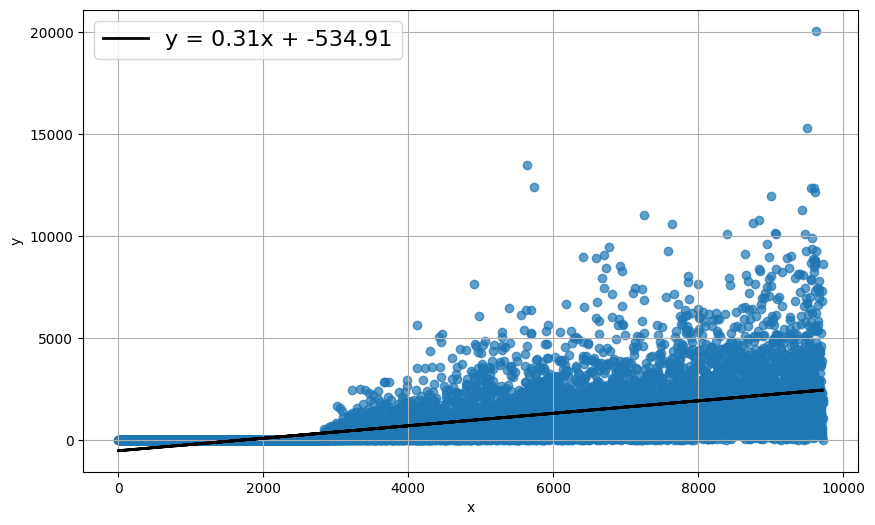

In [525]:
model_a = model.coef_[0]
model_b = model.intercept_

model_y_sk = model_a * x + model_b

fig = plt.figure(figsize=(10, 6))
x = np.array(data["author_last_played"], type(float))
plt.plot(x, model_y_sk, linewidth=2, color='black', label=f'y = {model_a:.2f}x + {model_b:.2f}')
plt.scatter(x, y, alpha=0.7)
plt.grid(True)
plt.xlabel('x')
plt.ylabel('y')
plt.legend(prop={'size': 16})
plt.show()

In [532]:
import sklearn.metrics as metrics

metrics.mean_squared_error(model_y_sk, y)

1408992.675415211